In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Open observations.csv and species_info.csv with pandas. The datasets provided have the following columns of data:

- species_info.csv:

    * category - class of animal
    * scientific_name - the scientific name of each species
    * common_name - the common names of each species
    * conservation_status - each species’ current conservation status

- observations.csv:

    * scientific_name - the scientific name of each species
    * park_name - Park where species were found
    * observations - the number of times each species was observed at park

In [2]:
species=pd.read_csv('species_info.csv')
observations=pd.read_csv('observations.csv')

We merge the species and the observations dataframes through the scientific name of species into the dataframe *data*.

The names of species that are not endangered have *conservation_status==NaN*.

We call *df* the dataframe that only contains the species that are more or less endangered (we drop missing data).

In [4]:
# All data
data=observations.merge(species,on='scientific_name')
# Only endangered
df=data.dropna()



We create one dataframe per park : 

In [38]:
park_names=data.park_name.unique()
categories=data.category.unique()
conservation=data.conservation_status.nunique()
# All species
Smoky_data=data[data.park_name==park_names[0]]
Yosemite_data=data[data.park_name==park_names[1]]
Bryce_data=data[data.park_name==park_names[2]]
Yellowstone_data=data[data.park_name==park_names[3]]
#Only endangered species
Smoky_df=df[df.park_name==park_names[0]]
Yosemite_df=df[df.park_name==park_names[1]]
Bryce_df=df[df.park_name==park_names[2]]
Yellowstone_df=df[df.park_name==park_names[3]]


In [5]:
pd.crosstab(data["park_name"], data["category"])

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
park_name,,,,,,,
Bryce National Park,82,591,131,300,333,81,4890
Great Smoky Mountains National Park,82,591,131,300,333,81,4890
Yellowstone National Park,82,591,131,300,333,81,4890
Yosemite National Park,82,591,131,300,333,81,4890


Over all 

# Distribution percentage of Categories (nedangered and non endangered) observed per park

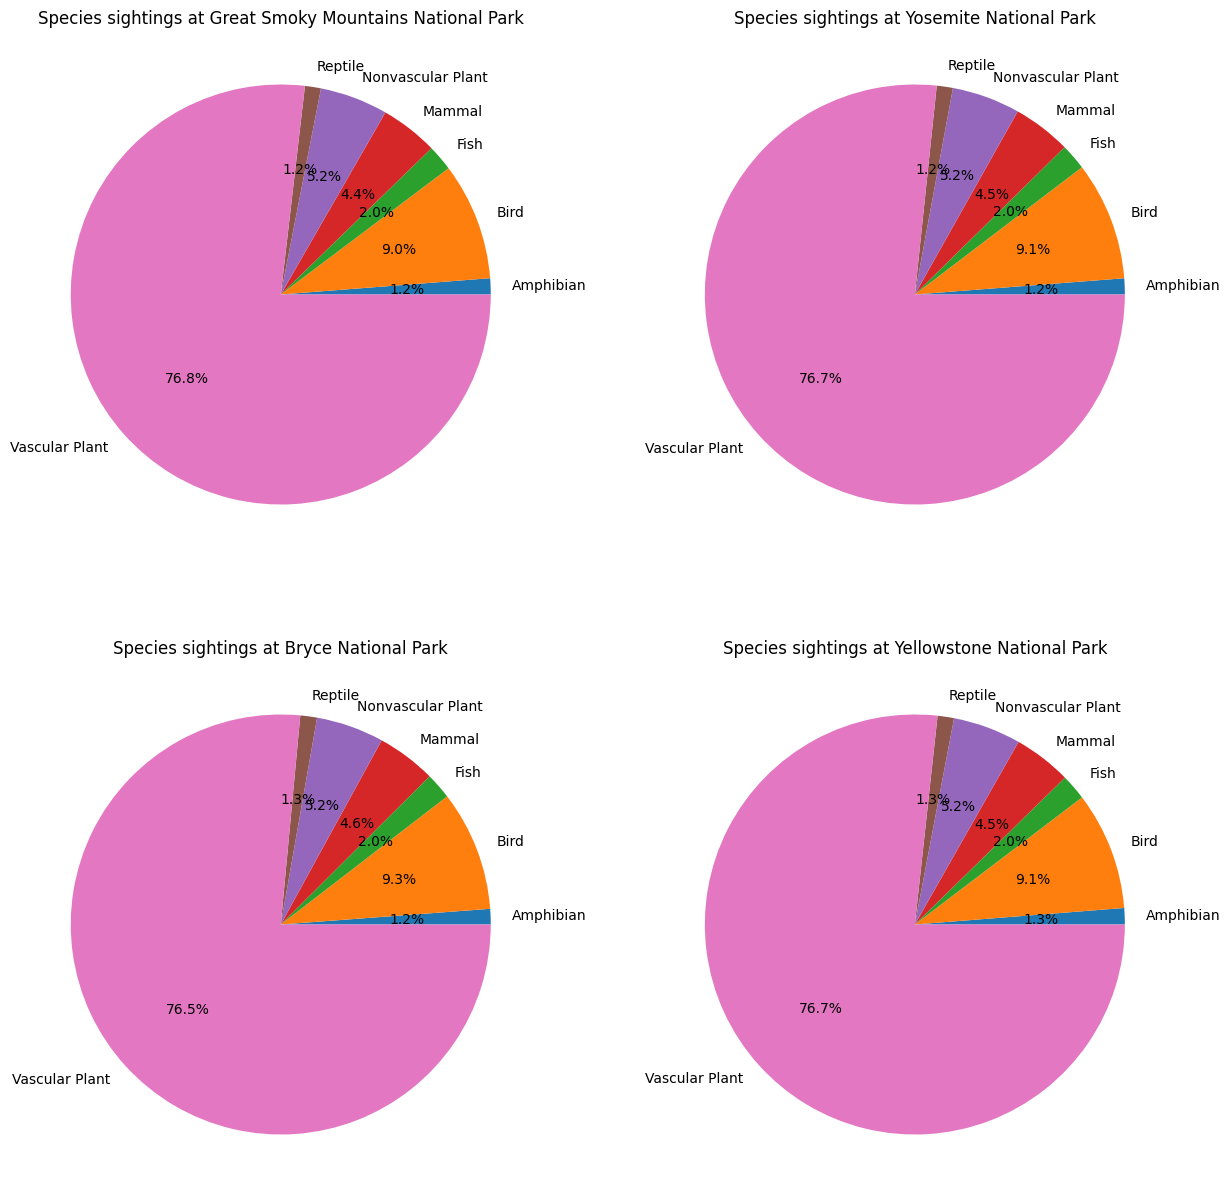

In [32]:
park_names=data.park_name.unique()
i=1
ax=[]
plt.figure(figsize=(15,15))
for i in range(len(park_names)):
    plt.subplot(2,2,i+1)
    park=park_names[i]
    dg=data[data.park_name==park]
    a=pd.pivot_table(dg, values=['observations'],index=['category'],aggfunc={'observations':"sum"}).observations
    b=a.index
    plt.pie(a,labels=b, autopct='%0.1f%%')
    plt.title("Species sightings at "+park)
    i=i+1
plt.show()

Frequency of observations of endangered species per park and category

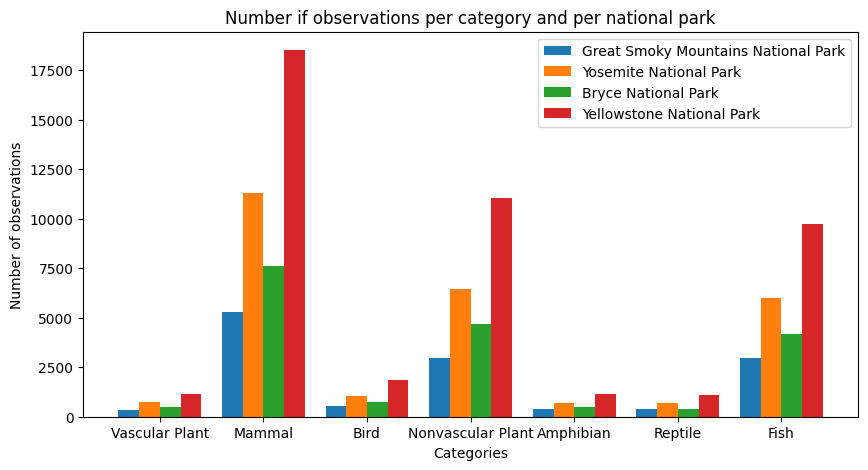

In [49]:

t = 4 # Number of datasets : number of parks
d = 7 # Number of sets of bars : number of categories
w = 0.8 # Width of each bar
#Paste the x_values code here
#store1_x = [t*element + w*n for element in range(d)]

n = 1  # This is our first dataset (out of 4)
Smoky_x = [t*element + w*n for element in range(d)]
Smoky_obs_cat=pd.pivot_table(Smoky_df, values=['observations'],index=['category'],aggfunc={'observations':"sum"}).observations
n = 2  # This is our second dataset (out of 2)
Yosemite_x = [t*element + w*n for element in range(d)]
Yosemite_obs_cat=pd.pivot_table(Yosemite_df, values=['observations'],index=['category'],aggfunc={'observations':"sum"}).observations
n = 3  # This is our second dataset (out of 2)
Bryce_x = [t*element + w*n for element in range(d)]
Bryce_obs_cat=pd.pivot_table(Bryce_df, values=['observations'],index=['category'],aggfunc={'observations':"sum"}).observations

n = 4  # This is our second dataset (out of 2)
Yellowstone_x = [t*element + w*n for element in range(d)]
Yellowstone_obs_cat=pd.pivot_table(Yellowstone_df, values=['observations'],index=['category'],aggfunc={'observations':"sum"}).observations

x_ticks=[elem+0.4 for elem in Yosemite_x]
#t = 2 # Number of datasets
#d = 6 # Number of sets of bars
#w = 0.8 # Width of each bar
store2_x = [t*element + w*n for element in range(d)]

plt.figure(figsize=(10,5))
ax=plt.subplot()
plt.bar(Smoky_x,Smoky_obs_cat)
plt.bar(Yosemite_x,Yosemite_obs_cat)
plt.bar(Bryce_x,Bryce_obs_cat)
plt.bar(Yellowstone_x,Yellowstone_obs_cat)
plt.xlabel("Categories")
plt.ylabel("Number of observations")
plt.legend(park_names)
ax.set_xticks(x_ticks)
ax.set_xticklabels(categories)
plt.title("Number if observations per category and per national park")
plt.show()


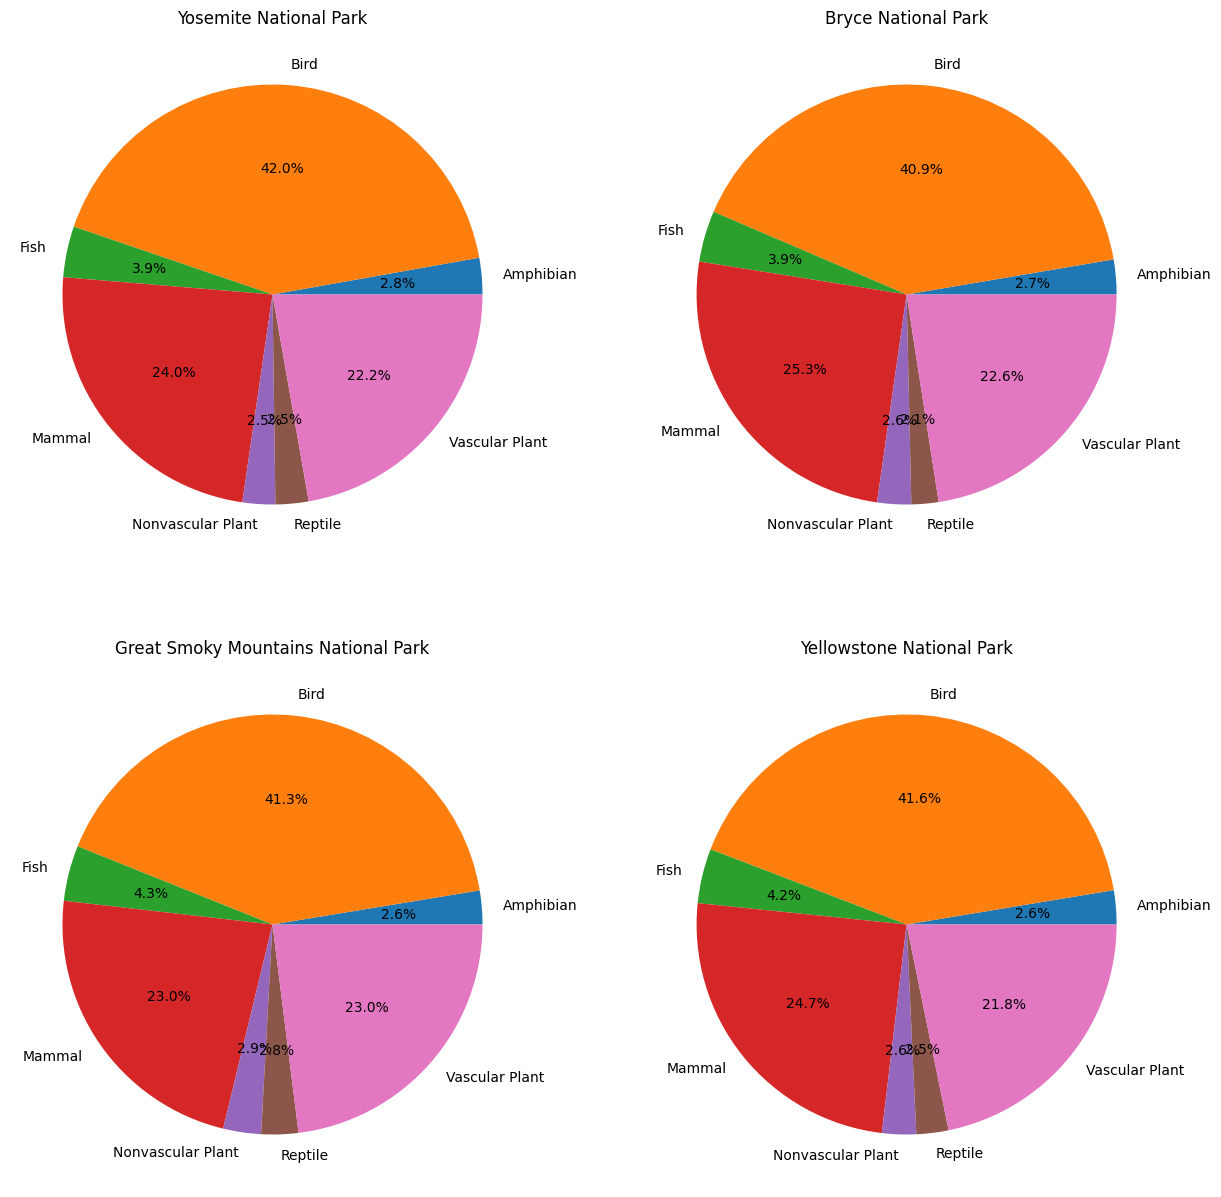

In [54]:
park_names=df.park_name.unique()

plt.figure(figsize=(15,15))

ax1=plt.subplot(2,2,1)
park=park_names[0]
dg=df[df.park_name==park]
a=pd.pivot_table(dg, values=['observations'],index=['category'],aggfunc={'observations':"sum"}).observations
b=a.index
plt.pie(a,labels=b, autopct='%0.1f%%')
plt.title(park)


ax2=plt.subplot(2,2,2)
park=park_names[1]
dg=df[df.park_name==park]
a=pd.pivot_table(dg, values=['observations'],index=['category'],aggfunc={'observations':"sum"}).observations
b=a.index
plt.pie(a,labels=b, autopct='%0.1f%%')
plt.title(park)


ax3=plt.subplot(2,2,3)
park=park_names[2]
dg=df[df.park_name==park]
a=pd.pivot_table(dg, values=['observations'],index=['category'],aggfunc={'observations':"sum"}).observations
b=a.index
plt.pie(a,labels=b, autopct='%0.1f%%')
plt.title(park)


ax4=plt.subplot(2,2,4)
park=park_names[3]
dg=df[df.park_name==park]
a=pd.pivot_table(dg, values=['observations'],index=['category'],aggfunc={'observations':"sum"}).observations
b=a.index
plt.pie(a,labels=b, autopct='%0.1f%%')
plt.title(park)
plt.show()

In [24]:
pd.pivot_table(df,values=['observations'],index=['park_name','category'],aggfunc={'observations':np.sum})

pd.pivot_table(df,values=['ones'],index=['category','park_name'],aggfunc={'ones':np.sum})

pd.crosstab(df["park_name"], df["category"])



C:\Users\Ainhoa\AppData\Local\Temp\ipykernel_18404\2253493610.py:1: FutureWarning: The provided callable <function sum at 0x000002B3EBE7FB50> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(df,values=['observations'],index=['park_name','category'],aggfunc={'observations':np.sum})
C:\Users\Ainhoa\AppData\Local\Temp\ipykernel_18404\2253493610.py:3: FutureWarning: The provided callable <function sum at 0x000002B3EBE7FB50> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(df,values=['ones'],index=['category','park_name'],aggfunc={'ones':np.sum})


category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
park_name,,,,,,,
Bryce National Park,7,87,12,58,5,5,46
Great Smoky Mountains National Park,7,87,12,58,5,5,46
Yellowstone National Park,7,87,12,58,5,5,46
Yosemite National Park,7,87,12,58,5,5,46


In [34]:
df[(df['park_name']=='Bryce National Park') & (df['category']=='Amphibian')]


,scientific_name,park_name,observations,category,common_names,conservation_status,ones
5645,Rana draytonii,Bryce National Park,37,Amphibian,California Red-Legged Frog,Threatened,1
8747,Cryptobranchus alleganiensis alleganiensis,Bryce National Park,95,Amphibian,Eastern Hellbender,Species of Concern,1
10028,Desmognathus wrighti,Bryce National Park,95,Amphibian,Pigmy Salamander,Species of Concern,1
16593,Anaxyrus canorus,Bryce National Park,43,Amphibian,Yosemite Toad,Threatened,1
17968,Rana sierrae,Bryce National Park,31,Amphibian,Sierra Nevada Yellow-Legged Frog,Endangered,1
19087,Rana luteiventris,Bryce National Park,69,Amphibian,Columbia Spotted Frog,Species of Concern,1
21594,Hydromantes platycephalus,Bryce National Park,128,Amphibian,Mount Lyell Salamander,Species of Concern,1


In [33]:
df[(df['park_name']=='Great Smoky Mountains National Park') & (df['category']=='Amphibian')]

,scientific_name,park_name,observations,category,common_names,conservation_status,ones
378,Rana draytonii,Great Smoky Mountains National Park,43,Amphibian,California Red-Legged Frog,Threatened,1
552,Anaxyrus canorus,Great Smoky Mountains National Park,30,Amphibian,Yosemite Toad,Threatened,1
13340,Hydromantes platycephalus,Great Smoky Mountains National Park,75,Amphibian,Mount Lyell Salamander,Species of Concern,1
14276,Cryptobranchus alleganiensis alleganiensis,Great Smoky Mountains National Park,58,Amphibian,Eastern Hellbender,Species of Concern,1
16312,Rana luteiventris,Great Smoky Mountains National Park,31,Amphibian,Columbia Spotted Frog,Species of Concern,1
18607,Desmognathus wrighti,Great Smoky Mountains National Park,85,Amphibian,Pigmy Salamander,Species of Concern,1
20710,Rana sierrae,Great Smoky Mountains National Park,11,Amphibian,Sierra Nevada Yellow-Legged Frog,Endangered,1


In [35]:
df[(df['park_name']=='Yellowstone National Park') & (df['category']=='Amphibian')]

,scientific_name,park_name,observations,category,common_names,conservation_status,ones
424,Desmognathus wrighti,Yellowstone National Park,201,Amphibian,Pigmy Salamander,Species of Concern,1
6297,Cryptobranchus alleganiensis alleganiensis,Yellowstone National Park,224,Amphibian,Eastern Hellbender,Species of Concern,1
8859,Rana draytonii,Yellowstone National Park,141,Amphibian,California Red-Legged Frog,Threatened,1
13151,Rana sierrae,Yellowstone National Park,60,Amphibian,Sierra Nevada Yellow-Legged Frog,Endangered,1
15147,Rana luteiventris,Yellowstone National Park,238,Amphibian,Columbia Spotted Frog,Species of Concern,1
15750,Hydromantes platycephalus,Yellowstone National Park,189,Amphibian,Mount Lyell Salamander,Species of Concern,1
23002,Anaxyrus canorus,Yellowstone National Park,114,Amphibian,Yosemite Toad,Threatened,1


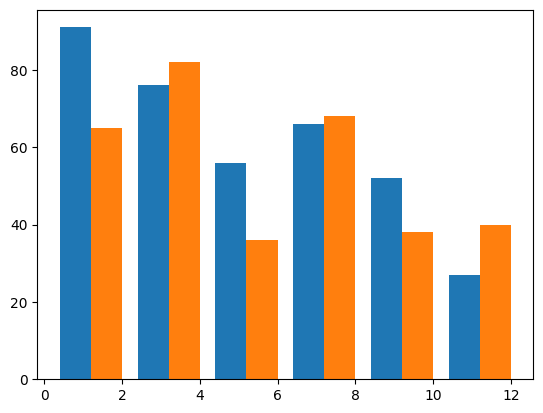

In [5]:
#import codecademylib
from matplotlib import pyplot as plt

drinks = ["cappuccino", "latte", "chai", "americano", "mocha", "espresso"]
sales1 =  [91, 76, 56, 66, 52, 27]
sales2 = [65, 82, 36, 68, 38, 40]

n = 1  # This is our first dataset (out of 2)
t = 2 # Number of datasets
d = 6 # Number of sets of bars
w = 0.8 # Width of each bar
#Paste the x_values code here
store1_x = [t*element + w*n for element in range(d)]

n = 2  # This is our second dataset (out of 2)
t = 2 # Number of datasets
d = 6 # Number of sets of bars
w = 0.8 # Width of each bar
store2_x = [t*element + w*n for element in range(d)]



plt.bar(store1_x,sales1)
plt.bar(store2_x,sales2)
plt.show()


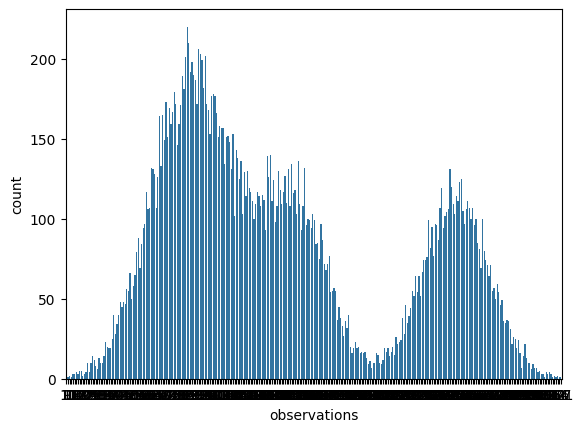

In [4]:
sns.countplot(observations, x="observations")

#sns.countplot(observations.observations)
plt.show()



In [9]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [7]:
observations.groupby("park_name").observations.sum()


park_name
Bryce National Park                     576025
Great Smoky Mountains National Park     431820
Yellowstone National Park              1443562
Yosemite National Park                  863332
Name: observations, dtype: int64

In [8]:
observations.groupby("scientific_name").observations.sum()

scientific_name
Abies bifolia                          532
Abies concolor                         630
Abies fraseri                          518
Abietinella abietina                   592
Abronia ammophila                      523
                                      ... 
Zonotrichia leucophrys gambelii        560
Zonotrichia leucophrys oriantha        558
Zonotrichia querula                    616
Zygodon viridissimus                   600
Zygodon viridissimus var. rupestris    651
Name: observations, Length: 5541, dtype: int64

In [10]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [17]:
species.conservation_status.value_counts()

conservation_status
Not endangered        5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: count, dtype: int64

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not endangered
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,Not endangered
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,Not endangered
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,Not endangered
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,Not endangered
...,...,...,...,...,...,...
25627,Croton monanthogynus,Yosemite National Park,173,Vascular Plant,Prairie Tea,Not endangered
25628,Otospermophilus beecheyi,Bryce National Park,130,Mammal,California Ground Squirrel,Not endangered
25629,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140,Vascular Plant,Sessileflower False Goldenaster,Not endangered
25630,Dicranella rufescens,Yosemite National Park,171,Nonvascular Plant,Dicranella Moss,Not endangered
